<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#線形回帰" data-toc-modified-id="線形回帰-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>線形回帰</a></span></li><li><span><a href="#線形重回帰の例" data-toc-modified-id="線形重回帰の例-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>線形重回帰の例</a></span><ul class="toc-item"><li><span><a href="#サンプル：bostonデータ" data-toc-modified-id="サンプル：bostonデータ-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>サンプル：bostonデータ</a></span><ul class="toc-item"><li><span><a href="#データの内容" data-toc-modified-id="データの内容-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>データの内容</a></span></li></ul></li><li><span><a href="#データの準備（読み込み）" data-toc-modified-id="データの準備（読み込み）-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>データの準備（読み込み）</a></span></li><li><span><a href="#データを訓練データとテスト用データに分割" data-toc-modified-id="データを訓練データとテスト用データに分割-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>データを訓練データとテスト用データに分割</a></span></li><li><span><a href="#訓練とテスト（scikit-learnの重回帰モジュールの適用）" data-toc-modified-id="訓練とテスト（scikit-learnの重回帰モジュールの適用）-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>訓練とテスト（scikit-learnの重回帰モジュールの適用）</a></span><ul class="toc-item"><li><span><a href="#今後の授業内容との関係" data-toc-modified-id="今後の授業内容との関係-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>今後の授業内容との関係</a></span></li></ul></li></ul></li><li><span><a href="#補足-(pandasの利用)" data-toc-modified-id="補足-(pandasの利用)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>補足 (pandasの利用)</a></span><ul class="toc-item"><li><span><a href="#(例1)-結果を見やすく表示" data-toc-modified-id="(例1)-結果を見やすく表示-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>(例1) 結果を見やすく表示</a></span></li><li><span><a href="#データ全体をpandasで処理してみる" data-toc-modified-id="データ全体をpandasで処理してみる-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>データ全体をpandasで処理してみる</a></span><ul class="toc-item"><li><span><a href="#DataFrameへの読み込み" data-toc-modified-id="DataFrameへの読み込み-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>DataFrameへの読み込み</a></span></li><li><span><a href="#諸量の関係-(散布図matrix)" data-toc-modified-id="諸量の関係-(散布図matrix)-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>諸量の関係 (散布図matrix)</a></span></li></ul></li></ul></li><li><span><a href="#Exercise-2a-(補足問題:-時間があれば試みる)" data-toc-modified-id="Exercise-2a-(補足問題:-時間があれば試みる)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercise 2a (補足問題: 時間があれば試みる)</a></span></li></ul></div>

# 回帰の基礎

<div style="text-align: right;">
    <a href="index.html">[トップページへ]</a><br/>
    <a href="multiple_regression.ipynb">このページのオリジナルのipynbファイル</a>
</div>

## 線形回帰

ある量$y$とほかの量$x_1,x_2,\cdots, x_n$との関係をデータから割り出したいという問題を考える。

ある現象に対して要因と考えられるいくつかを挙げ、それらの寄与度を調べたり、要因となる諸量の値から現象を予測するというような問題ある。分野によっていろいろな呼び名があるが、ここでは、目的変数、説明変数という用語を用いる。

両者が線形の関係
$$
y = w_1 x_1 + w_2 x_2 + \cdots + w_n x_n
$$
にあるとして、その係数$w_1, \cdots, w_n$をデータから決定する問題を線形重回帰分析（モデル）と呼ぶ。（あとで述べるように、非線形な関係を求める場合へも適用可能である。）

この問題を数値的に求めるライブラリとして、この講義では主に、scikit-learnを用いることにする。

sckit-learnでは（多くの場合、ほかのツール同様であるが）、項目を列として定義し、行にデータを並べることが多い。下の例は、次節で扱うデータの例である。


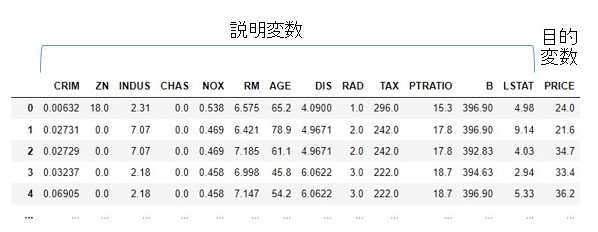

「２次元配列」としてデータを用意するのであるが、どちらを行、どちらを列としてもよいのではなく、上述のように並べる必要があることに注意しよう。

説明変数が一つの場合も、説明変数はデータは1列N行の配列に作成する。


## 線形重回帰の例

### サンプル：bostonデータ

統計ソフトの多くに付属しているボストンデータを例に重回帰について試してみる。目的は線形重回帰を理解することにあるが、非線形単回帰との関連についても考察する。

ボストンデータとは、ボストン市内の住宅物件の価格と様々な社会的データをまとめたものであり、それぞれの社会的データから価格を予測（評価）する手法を考察しようとするものである。

#### データの内容

以下のような項目(Attribute)と物件の価格のデータが500件あまり用意されている。

| Attribute	| description |
| :---- | :---- |
| CRIM | 人口 1 人当たりの犯罪発生数
| ZN	| 25,000平方フィート以上の住居区画の占める割合
| INDUS	| 小売業以外の商業が占める面積の割合
| CHAS	| チャールズ川によるダミー変数 (1: 川の周辺, 0: それ以外)
| NOX	| NOx の濃度
| RM	| 住居の平均部屋数
| AGE	| 1940 年より前に建てられた物件の割合
| DIS	| 5 つのボストン市の雇用施設からの距離 (重み付け済)
| RAD	| 環状高速道路へのアクセスしやすさ
| TAX	| $10,000 ドルあたりの不動産税率の総計
| PTRATIO	| 町毎の児童と教師の比率
| B	| 町毎の黒人 (Bk) の比率を次の式で表したもの。 1000(Bk – 0.63)2
| LSTAT	| 給与の低い職業に従事する人口の割合 (%)

これらの項目を説明変数(feature 特徴量)、住宅物件の価格を目的変数(target)として、両者が線形な関係にあると仮定して、その係数を求めることを線形重回帰と呼ぶ。

説明変数を$(x_1, x_2, \cdots, x_M)$、目的変数を$y$で表せば、

$$
 y = w_1 x_1 + w_2 x_2 + \cdots + w_M x_M
$$


参考："scikit-learn boston 重回帰"くらいで検索すると山のようにページがでてくるが、上位のものとしては

- 重回帰について解説しているページ https://qiita.com/meme_gene/items/7c9b8399ef84a36aefe4 
- より進んで、サポートベクトル回帰や特徴量抽出に触れたページ　https://qiita.com/meme_gene/items/7c9b8399ef84a36aefe4

そのほか、ランダムフォレストを使った分析もある。（後の回に、若干ふれる）

重回帰は、複数の
以下では、最初にあげたページに沿って実行（訓練）し、係数を決めた後、テストデータを使って予測の良さを調べてみる。

### データの準備（読み込み）

In [1]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

In [2]:
# Bostonデータの項目確認
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### データを訓練データとテスト用データに分割

以下で、randome_state=0として分割の仕方を固定している。実際には、何種類もの分割を試して、モデルの良さを確かめる、交差検定を行う。


In [3]:
from sklearn.model_selection import train_test_split
# 入出力の切り分け
x = boston['data']  # 物件の情報
t = boston['target']  # 家賃
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=0) # データの70%を訓練用に、残りをテスト用に

print(x_train[:3,:]) # 試しに最初の３行を出力

[[1.62864e+00 0.00000e+00 2.18900e+01 0.00000e+00 6.24000e-01 5.01900e+00
  1.00000e+02 1.43940e+00 4.00000e+00 4.37000e+02 2.12000e+01 3.96900e+02
  3.44100e+01]
 [1.14600e-01 2.00000e+01 6.96000e+00 0.00000e+00 4.64000e-01 6.53800e+00
  5.87000e+01 3.91750e+00 3.00000e+00 2.23000e+02 1.86000e+01 3.94960e+02
  7.73000e+00]
 [5.57780e-01 0.00000e+00 2.18900e+01 0.00000e+00 6.24000e-01 6.33500e+00
  9.82000e+01 2.11070e+00 4.00000e+00 4.37000e+02 2.12000e+01 3.94670e+02
  1.69600e+01]]


### 訓練とテスト（scikit-learnの重回帰モジュールの適用）

順序は

1. moduleの読み込み
2. objectの用意 (下のプログラムではmodel)
3. メソッドfitに説明変数、目的変数を与えて学習 (係数はmodelの中に保持）
 - 説明変数は、列として各種項目(feature)を、１データ１行の行列として与える。

その後、
4. テスト用データとしてとっておいた、説明変数値を与えて予測値を算出し、テスト用の目的変数（住宅価格）と比べてみる。




In [4]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, t_train) # training

model.score(x_train, t_train) # 決定係数R^2の出力

0.7645451026942549

決定係数

テストデータの実測値を$(t_1, t_2, \cdots, t_N)$、予測(推定)値を$(y_1, y_2, \cdots, y_N)$としたとき
$$
R^2 = 1 - \frac{\sum_{i=1}^N (y_i - t_i)^2}{ \sum_{i=1}^N (t_i - \bar{t})^2}
$$

Text(0, 0.5, 'observed value')

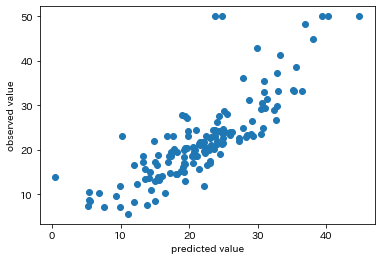

In [5]:
# テストデータの予測値と実測値比較

x_predict = model.predict(x_test) # テストデータ（家賃）の予測値

import matplotlib.pyplot as plt
plt.plot(x_predict, t_test, "o")
plt.xlabel("predicted value")
plt.ylabel("observed value")

#### 今後の授業内容との関係



授業では、もっぱら説明変数が１つで目的変数との関係が非線形な場合を扱う。

ここで線形重回帰に触れたのは、重回帰の場合

$$
 y = w_1 x_1 + w_2 x_2 + \cdots + w_M x_M
$$

で使ったLinearRegressionは非線形な回帰で用いることができるという点である。

一つの説明変数$x$と目的変数$y$が非線形な関係にあると推量される場合、、例えばその関係が「べき関数」だとすれば、各項目(Attribute)を$x$のべき乗として
$$
 y = w_1 x + w_2 x^2 + \cdots w_M x^M
$$

のようにかけば、係数$\{w_i\}$を線形重回帰で推定することと同じであうことがわかるだろう。

**$N$個のデータがあるとき、説明変数としては、各行に$x^1, x^2,\cdots, x^{M-1}$の値をセットした$N$行の行列を与えることになる。**
<br/>
<br/>

**[補足]**
一般に、1つの説明変数$x$、1つの目的変数$y$の間に非線形な関係がある場合、$x$に対するいくつかの関数を用意し、それの線形結合によって表す。

$$
  y = w_1\phi_1 (x) + w_2 \phi_2 (x) + \cdots + w_M\phi_M (x)
$$

のように書いて、線形重回帰と同様のスキームで扱う。このような場合、
$\{\phi_i\}$のセットを「基底」と呼び、データの性質によって、べき以外に、ガウシアンやシグモイド関数（$\tanh$関数）、フーリエ基底（三角関数）を用いることが多い。フーリエ基底の場合はwaveletと呼ばれる。


## 補足 (pandasの利用)

データの可視化や様々な加工にはpandasを用いる方が便利である。


###  (例1) 結果を見やすく表示

In [7]:
# 回帰係数の出力
print(model.coef_)

[-1.21310401e-01  4.44664254e-02  1.13416945e-02  2.51124642e+00
 -1.62312529e+01  3.85906801e+00 -9.98516565e-03 -1.50026956e+00
  2.42143466e-01 -1.10716124e-02 -1.01775264e+00  6.81446545e-03
 -4.86738066e-01]


In [8]:
# 回帰係数とfeatureの名前を結合してみる
import numpy as np
coef_names = np.stack([boston.feature_names, model.coef_])
print(coef_names)

[['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
  'B' 'LSTAT']
 ['-0.12131040096834629' '0.04446642542889598' '0.011341694511898402'
  '2.5112464244913792' '-16.23125290285598' '3.8590680098251915'
  '-0.009985165654562847' '-1.500269563265005' '0.2421434660581058'
  '-0.011071612402085984' '-1.0177526384185978' '0.006814465447642474'
  '-0.48673806564491884']]


In [34]:
# 上記が見にくいので、pandasのDataFrameに直して出力してみる
import pandas as pd
result= pd.DataFrame(coef_names)
# NOXが負の大きな値に、RMが正の比較的大きな値になっていることがわかる。
result

0                    1                     2  \
0                  CRIM                   ZN                 INDUS   
1  -0.12131040096834629  0.04446642542889598  0.011341694511898402   

                    3                   4                   5  \
0                CHAS                 NOX                  RM   
1  2.5112464244913792  -16.23125290285598  3.8590680098251915   

                       6                   7                   8  \
0                    AGE                 DIS                 RAD   
1  -0.009985165654562847  -1.500269563265005  0.2421434660581058   

                       9                   10                    11  \
0                    TAX              PTRATIO                     B   
1  -0.011071612402085984  -1.0177526384185978  0.006814465447642474   

                     12  
0                 LSTAT  
1  -0.48673806564491884

In [36]:
# 行と列を入れ替え
result = pd.DataFrame(coef_names).T
# 絶対値で降順にソート
result['abs_coef'] = np.abs(result[1].astype(float))
result.sort_values('abs_coef', ascending=False)

0                      1   abs_coef
4       NOX     -16.23125290285598  16.231253
5        RM     3.8590680098251915   3.859068
3      CHAS     2.5112464244913792   2.511246
7       DIS     -1.500269563265005   1.500270
10  PTRATIO    -1.0177526384185978   1.017753
12    LSTAT   -0.48673806564491884   0.486738
8       RAD     0.2421434660581058   0.242143
0      CRIM   -0.12131040096834629   0.121310
1        ZN    0.04446642542889598   0.044466
2     INDUS   0.011341694511898402   0.011342
9       TAX  -0.011071612402085984   0.011072
6       AGE  -0.009985165654562847   0.009985
11        B   0.006814465447642474   0.006814

係数の大きさは、単純には寄与度を表すが、注意が必要　⇒　一番下の記述を参照！

### データ全体をpandasで処理してみる

#### DataFrameへの読み込み

In [1]:
from sklearn.datasets import load_boston
boston = load_boston() # データセットの読み込み

# データをpandasのDataFrameに入れて処理
import pandas as pd
boston_df = pd.DataFrame(boston.data, columns=boston.feature_names)# 説明変数(data) 
boston_df['PRICE'] = boston.target # 目的変数(target)をDataFrameの列として追加
boston_df

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  PRICE  
0       15.3  396.90   4.98   24.0  
1       17.8  396.90   9.14   21.6  
2       17.8  392.83   4.03   34.7  
3       18.7  394.63   2.94   33.4  
4       18.7  396.90   5.33   36.2  
..       ...     ...    ...    ...  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9  

[506 rows x 14 columns]

#### 諸量の関係 (散布図matrix)

<div name="scatter_matrix_boston">２つの量の関係を散布図一覧（散布図matrix）にしてみる。</div>


[]

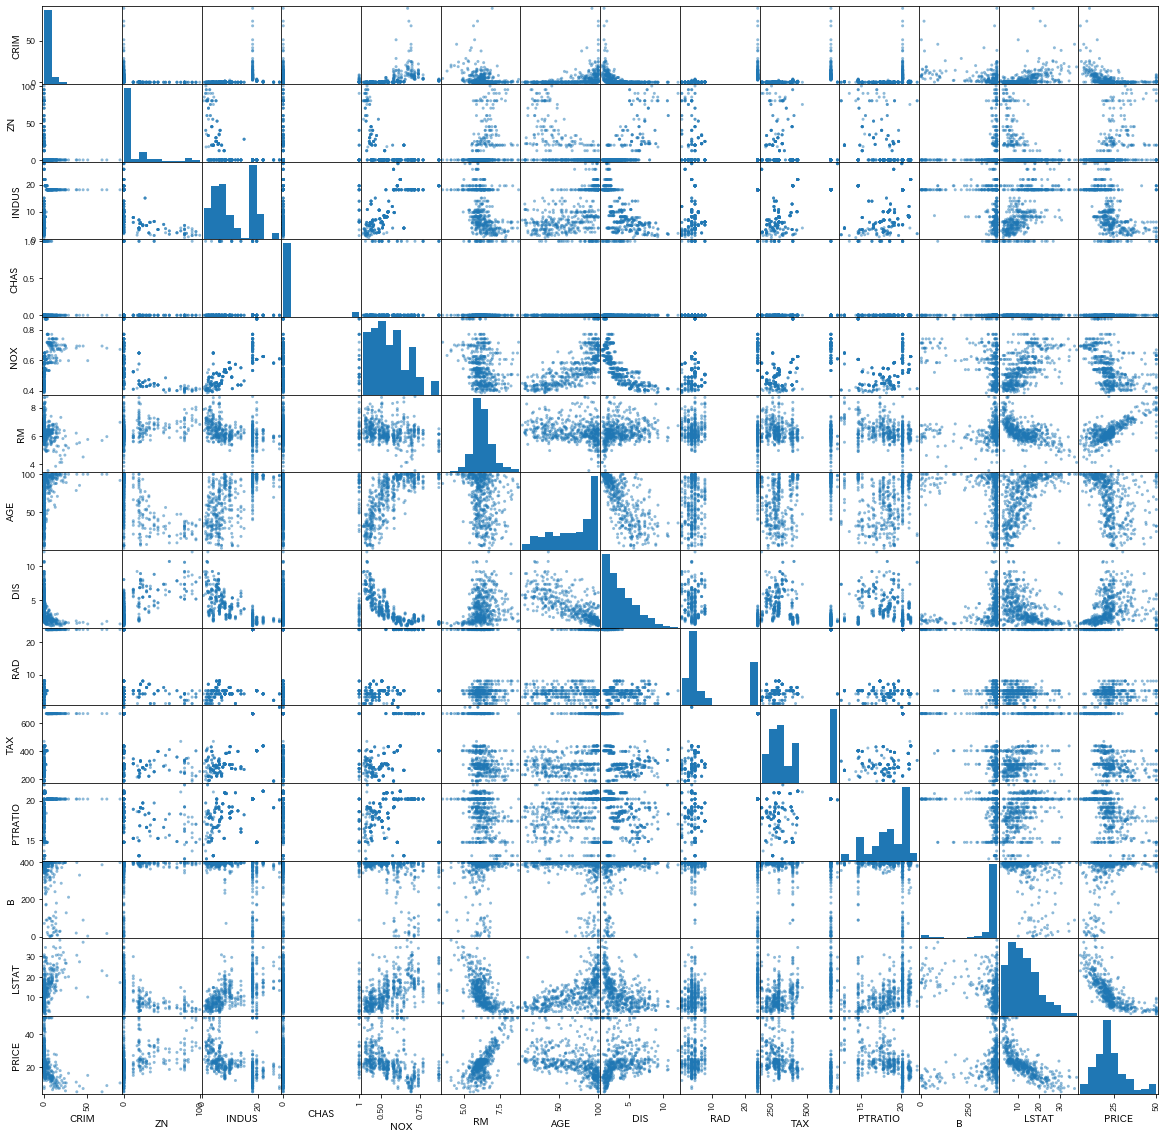

In [16]:
import matplotlib.pyplot as plt

# 全データ項目の散布図
pd.plotting.scatter_matrix(boston_df,figsize=(20,20))
plt.plot()

一番下の散布図に注目してみよう。

縦軸は、目的変数の「価格」である。

RMと相関、NOXとLSTATが逆相関になっていることが目立つだろう。

RMとNOXの重回帰係数の絶対値が大きくなっていることと符合する。が、LSTATの係数が小さいのはなぜだろうか？

各項目（列）の統計諸量を見てみよう。

In [8]:
# Calculate the statistical values of columns
boston_df.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       PRICE  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

それぞれの属性の平均値や標準偏差がばらついていることがわかる。これらを平均値をそろえ（ゼロに統一）、スケールして標準偏差をそろえることにより「平等に扱う」手続きを
<span class="burk">データの「標準化」(standardization)</span>という。

標準化のモジュールはsklearnに含まれている。
標準化は次のように行うことができる時間があればこれを試してみよう。
 
 ```python
# データの標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), index=X_train.index.values, columns=X_train.columns.values)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), index=X_test.index.values, columns=X_test.columns.values)
```

## Exercise 2a (補足問題: 時間があれば試みる)

Bostonデータについて正規化を行って、精度の改善がどの程度可能かテストしてみなさい。

ボストンデータのような様々な属性のデータを使って、予測する場合には、木構造にデータを分割するランダムフォレストによる回帰分析が良く用いられる。
たとえば、アルゴリズムの説明を抜きにシンプルなコードのみを説明したページとして

https://hinomaruc.hatenablog.com/entry/2019/11/14/200857

を上げて置く。(6週目ではこれを実際に使ってみる。)




In [1]:
%%html
<link rel="stylesheet" type="text/css" href="custom.css">